In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import glob
import numpy as np
import stephane.display.graphes as graphes
#import stephane.elasticity.processing as proc
import fluids2d.backlight as bl
import pims
import lea.danjruth.piv as piv
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
import stephane.cine.cine as cine
import stephane.tools.Smath as Smath
import scipy.interpolate as interp
import sys

import stephane.analysis.cdata as cdata

import lea.hdf5.h5py_convert as h5pylea
import lea.data.Data as ldata

import lea.mesure.Mesure as mesure
import lea.mesure.Volume as lvolume
import lea.mesure.Piv3D as lpiv3d

In [5]:
if sys.platform=='win32':
    base = 'F:'
if sys.platform=='linux':
    base = '/media/stephane/DATA'
if sys.platform=='darwin':
    base = '/Volumes/Diderot/DATA_MSC_Jamin/'
    base = '/Volumes/Diderot/DATA_Princeton_November2018/'

date = '20181126'
folder = base+date+'/'
ext = '.cine'
l=glob.glob(folder+'*'+ext)
for i,name in enumerate(l):
    print(str(i)+' : '+os.path.basename(name))

s = input()
try:
    i = int(s)
except:
    print("cannot be converted to an integer")

cinefile = l[i]

0 : PIV3d_scan_nikon105mm_fps20k_galvo1k_A800mV.cine
0


In [6]:
savefolder = '/Users/stephane/Documents/JRC_ENS/Data/Turbulence3d/'+date+'/'

In [41]:
ext = '.hdf5'
l=glob.glob(folder+'*'+ext)
for i,name in enumerate(l):
    print(str(i)+' : '+os.path.basename(name))

s = input()
try:
    i = int(s)
except:
    print("cannot be converted to an integer")

mesurefile = l[i]

0 : 20181126_1_PIV3d_scan_nikon105mm_fps20k_galvo1k_A800mV.hdf5
1 : Mesure_PIV3d_20181126_1_PIV3d_scan_nikon105mm_fps20k_galvo1k_A800mV.hdf5
2 : Mesure_0_20181126_1_PIV3d_scan_nikon105mm_fps20k_galvo1k_A800mV.hdf5
1


In [8]:
mesurefile

'/Volumes/Diderot/DATA_MSC_Jamin/Turbulence3d/20181106/Mesure_0_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5'

In [11]:
ext = '.txt'
l=glob.glob(folder+'*'+ext)
for i,name in enumerate(l):
    print(str(i)+' : '+os.path.basename(name))

s = input()
try:
    i = int(s)
except:
    print("cannot be converted to an integer")

paramfile = l[i]

0 : PIV3dscan_nikon50mm_param.txt
1 : PIV3dscan_nikon50mm_param_EXPT2.txt
0


In [21]:
filenameM

'/Volumes/Diderot/DATA_MSC_Jamin/Turbulence3d/20181106/Mesure_0_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5_z450mm.hdf5'

In [42]:
f = h5pylea.ouverture_fichier(mesurefile)
M = h5pylea.h5py_in_Mesure(f)
f.close()#ouvrir un data à partir d'un hdf5 existant

<class 'module'>


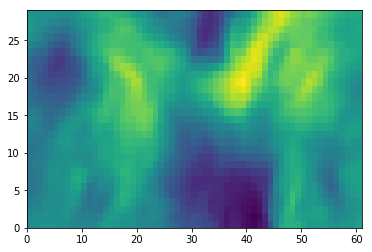

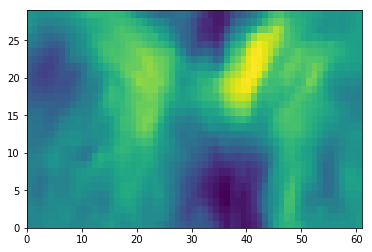

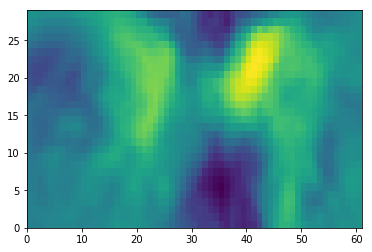

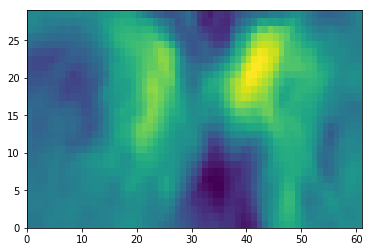

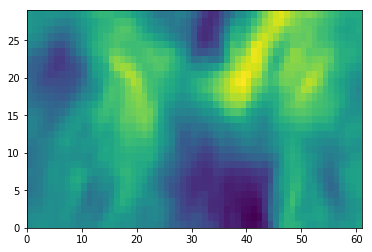

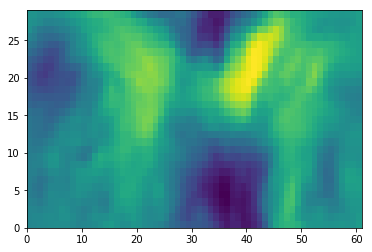

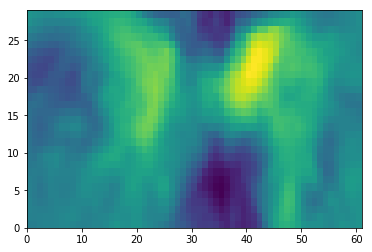

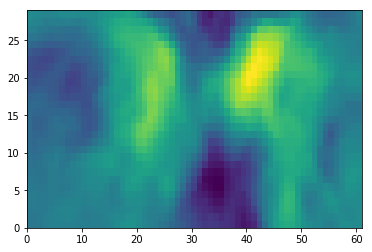

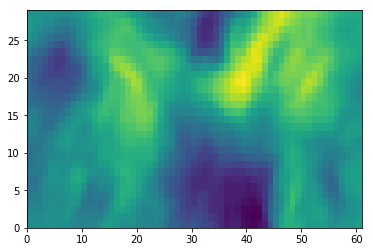

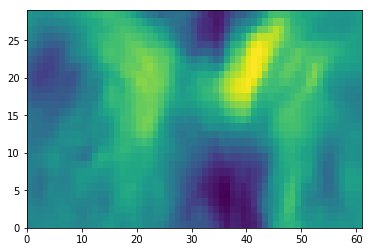

In [48]:
for i in range(10):
    plt.figure(i)
    plt.pcolormesh(M.PIV3D.m['mean_flow'][i,...,1])

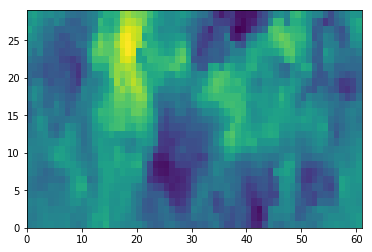

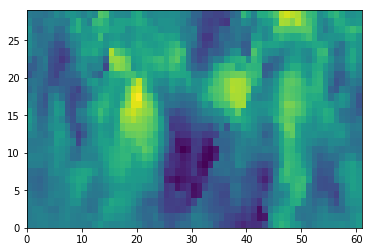

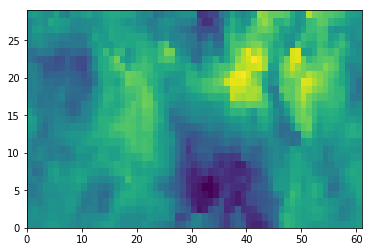

In [53]:
for i in range(3):
    plt.figure(i)
    plt.pcolormesh(M.PIV3D.m['U'][i*10,0,...,1])

In [11]:
f = h5pylea.ouverture_fichier(filename)
Data = h5pylea.h5py_in_Data(f)
f.close()#ouvrir un data à partir d'un hdf5 existant

<class 'module'>
{'PIV': '3d', 'nikon': '50mm', 'random': '16', 'fps': '40k', 'Pump': '30Hz', 'f': '1kHz', 'A': '1600mV', 'line': '5', 'z': '450mm'}


In [12]:
M.data.param.__dict__.update(Data.param.__dict__)

In [13]:
M.data.param.__dict__

{'fx': '0.277',
 'Comment': 'Mesure PIV 3D sur cuve T. Jamin a MSC, balayage laser a 90degres de la camera',
 'l_in': '40',
 'l_out': '48',
 'l_c': '44',
 'Dlaser': '152.6',
 'Dcamera': '73.6',
 'Angle': '0',
 'x0': '0',
 'y0': '70',
 'Dcuves': '(40,40,63)',
 'Laserwidth': 'Has been increased to about 2mm to avoid loss of particles between two adjacent images, and improve contrast',
 'spec': ['64pumps'],
 'PIV': '3d',
 'nikon': '50mm',
 'random': '16',
 'fps': '40k',
 'Pump': '30Hz',
 'f': '1kHz',
 'A': '1600mV',
 'line': '5',
 'z': '450mm'}

In [14]:
M.PIV3D.m['np'].shape

(127397, 23, 63, 2)

In [15]:
savefolder = '/Users/stephane/Documents/JRC_ENS/Data/Turbulence3d/'+date+'/'

In [43]:
f = h5pylea.file_name_in_dir(M, savefolder)
h5pylea.obj_in_h5py(M,f)
f.close()

[array([255,  30,  29, ...,  34,  32,  32], dtype=uint8), array([255,  30,  28, ...,  35,  34,  34], dtype=uint8), array([255,  31,  31, ...,  35,  33,  35], dtype=uint8), array([255,  29,  29, ...,  36,  36,  37], dtype=uint8), array([255,  28,  28, ...,  36,  37,  33], dtype=uint8), array([255,  30,  29, ...,  35,  36,  36], dtype=uint8), array([255,  31,  30, ...,  37,  37,  36], dtype=uint8), array([255,  28,  31, ...,  32,  38,  35], dtype=uint8), array([255,  31,  30, ...,  35,  33,  34], dtype=uint8), array([255,  33,  30, ...,  31,  32,  34], dtype=uint8), array([255,  33,  33, ...,  33,  35,  35], dtype=uint8), array([255,  32,  26, ...,  36,  31,  29], dtype=uint8), array([255,  32,  31, ...,  35,  37,  36], dtype=uint8), array([255,  30,  29, ...,  31,  34,  35], dtype=uint8), array([255,  33,  33, ...,  35,  32,  37], dtype=uint8), array([255,  28,  30, ...,  34,  34,  37], dtype=uint8), array([255,  27,  33, ...,  32,  36,  34], dtype=uint8), array([255,  38,  30, ...,  33

In [8]:
#Data = h5pylea.h5py_in_Data(h5pylea.ouverture_fichier(filename)) #ouvrir un data à partir d'un hdf5 existant
#Data = ldata.Data(cinefile,paramfile,spec=cinefile,date = date)

/Volumes/Diderot/DATA_MSC_Jamin//Turbulence3d/20181106/PIV3dscan_nikon50mm_param.txt


In [16]:
M.PIV3D.m['U']=M.PIV3D.m['np']

In [17]:
M.PIV3D.m.pop('np')

array([[[[        nan,         nan],
         [ 0.13556671,  0.39073753],
         [ 0.1564064 ,  0.43109322],
         ...,
         [ 0.22289276,  0.07855034],
         [ 0.05510712,  0.21123695],
         [        nan,         nan]],

        [[        nan,         nan],
         [ 0.12920761,  0.28606415],
         [ 0.18457794,  0.50195122],
         ...,
         [ 0.15868378, -0.02523804],
         [ 0.04642868,  0.22101402],
         [        nan,         nan]],

        [[        nan,         nan],
         [ 0.05560684,  0.27331543],
         [ 0.09174728,  0.22049713],
         ...,
         [ 0.24318314,  0.0135994 ],
         [ 0.30639267,  0.51788139],
         [        nan,         nan]],

        ...,

        [[        nan,         nan],
         [-0.53231049, -0.11958694],
         [-0.56869698, -0.11156464],
         ...,
         [ 0.39461899, -0.32661057],
         [ 0.24203491, -0.3030777 ],
         [        nan,         nan]],

        [[        nan,         nan

In [18]:
ff = M.PIV3D.m['U']

In [12]:
m = mesure.Mesure(Data)

In [27]:
a = 'totol'

In [13]:
m.data.nb_im

127437

In [14]:
cine_name = cinefile
dataname = folder+os.path.basename(cinefile).rsplit(".",1)[0]
save_folder = folder
dx =  float(m.data.param.fx)*10**-3#7.3469357156E-05
fps = int(m.data.param.fps[:-1])*1000
flaser = int(m.data.param.f[0])*1000

dt_orig = 1./fps
crop_lims=None
pre_constructed_masker = None
t0 = 0
a_frames = np.arange(t0,10000+t0,1)
frame_diff = fps//flaser

window_size = 32
overlap = 16

processing = piv.PIVDataProcessing('',cinefile,name_for_save=dataname,dx=dx,dt_orig=dt_orig,frame_diff=frame_diff,crop_lims=crop_lims,maskers=None,window_size=window_size,overlap=overlap,search_area_size=32)
processing.associate_flowfield()

N = processing.data.ff.shape[0]
Nt = N // frame_diff
print(Nt)
print(frame_diff)
ff = processing.data.ff[:Nt*frame_diff,...]

dx : 
0.000277
dt_ab: 
0.001
3184
40


dict_keys(['cine_filepath', 'parent_folder', 'cine_name', 'maskers', 'crop_lims', 'cine_frame_shape', 'window_size', 'overlap', 'search_area_size', 'frame_diff', 'dx', 'dt_orig', 'origin_pos', 'dt_ab', 'flow_field_res_filepath', 'name_for_save'])


In [19]:
#m.add_measurement(ff,name = 'U')
ff.shape

(127397, 23, 63, 2)

In [24]:
v = lvolume.Volume(Data)

In [28]:
Data.fichier = cinefile

In [29]:
v.data.fichier

'/Volumes/Diderot/DATA_MSC_Jamin/Turbulence3d/20181106/PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5_z450mm.cine'

In [30]:
v = v.volume(nb_im=300)

0 300
0
image : 0
image : 1
image : 2
image : 3
image : 4
image : 5
image : 6
image : 7
image : 8
image : 9
image : 10
image : 11
image : 12
image : 13
image : 14
image : 15
image : 16
image : 17
image : 18
image : 19
image : 20
image : 21
image : 22
image : 23
image : 24
image : 25
image : 26
image : 27
image : 28
image : 29
image : 30
image : 31
image : 32
image : 33
image : 34
image : 35
image : 36
image : 37
image : 38
image : 39
image : 40
image : 41
image : 42
image : 43
image : 44
image : 45
image : 46
image : 47
image : 48
image : 49
image : 50
image : 51
image : 52
image : 53
image : 54
image : 55
image : 56
image : 57
image : 58
image : 59
image : 60
image : 61
image : 62
image : 63
image : 64
image : 65
image : 66
image : 67
image : 68
image : 69
image : 70
image : 71
image : 72
image : 73
image : 74
image : 75
image : 76
image : 77
image : 78
image : 79
image : 80
image : 81
image : 82
image : 83
image : 84
image : 85
image : 86
image : 87
image : 88
image : 89
image : 90
i

deuxième partie : 223
deuxième partie : 224
deuxième partie : 225
deuxième partie : 226
deuxième partie : 227
deuxième partie : 228
deuxième partie : 229
deuxième partie : 230
deuxième partie : 231
deuxième partie : 232
deuxième partie : 233
deuxième partie : 234
deuxième partie : 235
deuxième partie : 236
deuxième partie : 237
deuxième partie : 238
deuxième partie : 239
deuxième partie : 240
deuxième partie : 241
deuxième partie : 242
deuxième partie : 243
deuxième partie : 244
deuxième partie : 245
deuxième partie : 246
deuxième partie : 247
deuxième partie : 248
deuxième partie : 249
deuxième partie : 250
deuxième partie : 251
deuxième partie : 252
deuxième partie : 253
deuxième partie : 254
deuxième partie : 255
deuxième partie : 256
deuxième partie : 257
deuxième partie : 258
deuxième partie : 259
deuxième partie : 260
deuxième partie : 261
deuxième partie : 262
deuxième partie : 263
deuxième partie : 264
deuxième partie : 265
deuxième partie : 266
deuxième partie : 267
deuxième p

In [82]:
v.m['instantV'][0]

(10, 30)

In [5]:
cinefile

'/media/stephane/DATA/Experimental_data/Turbulence3d/20181106/PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.cine'

In [34]:
M.data.param.fps = int(M.data.param.fps[:-1])*1000
M.data.param.f = int(M.data.param.f[:-3])*1000

#print(M.data.param.fps)
#print(M.data.param.f)
#print(M.data.param.fx)



In [38]:
N = ff.shape[0]
Nt = N // frame_diff
print(Nt)
print(frame_diff)
ff = ff[:Nt*frame_diff,...]

3184
40


In [39]:
 #convert 2d to 3d data
(Nt,Nx,Ny,Nc) = ff.shape
frame_diff = M.data.param.fps // M.data.param.f

ff = np.reshape(ff,(int(Nt/frame_diff),frame_diff,Nx,Ny,Nc))

#keep only one way volume scan
#ff = ff[...]

ff[...,1] = -ff[...,1] #reverse sign of horizontal component
#ff=ff[:,9:25,...]
(start,end) = v.m['instantV'][0]
ff=ff[:,start+2:end-2,...]

print(ff.shape)

(3184, 16, 23, 63, 2)


In [40]:
def nancount(data):
    print(data.shape)
    Nnan = np.sum(np.ndarray.flatten(np.isnan(data)))
    N = np.prod(data.shape)
    print('Ratio nan :' +str(Nnan/N))
    print('nan number :'+str(Nnan))

In [41]:
nancount(ff)
ff = ff[...,1:-1,1:-1,:]
nancount(ff)

(3184, 16, 23, 63, 2)
Ratio nan :0.07384477544294973
nan number :10902126
(3184, 16, 21, 61, 2)
Ratio nan :1.1339386236412352e-06
nan number :148


In [42]:
Nt = ff.shape[0]
for i in range(Nt):
    for j in range(2):
        data = np.squeeze(ff[i,...,j])
        indices = np.where(np.isnan(data))
        (t0,t1,t2) = indices
        for tup in zip(t0,t1,t2):
            data = cdata.replace_nan(data,tup)
        ff[i,...,j]=data
nancount(ff)

(3184, 16, 21, 61, 2)
Ratio nan :0.0
nan number :0


In [50]:
piv = M.PIV3D
piv.m['U'] = ff

In [52]:
piv.m.keys()

dict_keys(['U'])

In [23]:
piv = lpiv3d.Piv3D(Data)
piv.m['U'] = ff
#piv.m['t'] = 

In [46]:
#processing.__dict__.pop('data')
print(processing.__dict__.keys())
piv.m.update(processing.__dict__)

NameError: name 'processing' is not defined

In [25]:
m.add_measurement(piv)
m.add_measurement(v)

In [51]:
print(M.PIV3D.m['U'].shape)

(3184, 16, 21, 61, 2)


In [27]:
os.path.dirname(cinefile)

'/Volumes/Diderot/DATA_MSC_Jamin//Turbulence3d/20181106'

In [125]:
f.close()

In [43]:
#compute mean_flow
mean_flow = np.nanmean(ff,axis=0)
mean_flow_speed = np.linalg.norm(mean_flow,axis=2)
mean_speed = np.nanmean( np.sqrt(ff[...,0]**2 + ff[...,1]**2 ), axis=0)
fluc = ff - mean_flow    
u_rms = np.sqrt(np.nanmean(fluc[...,0]**2+fluc[...,1]**2 ,axis=0) )

In [53]:
piv.m['mean_flow'] = mean_flow
piv.m['fluc'] = fluc
piv.m['u_rms'] = u_rms

In [58]:
dz = float(piv.data.param.l_c)/frame_diff*2
print(dz)

2.2


In [63]:
piv.m['overlap'] = 16
dx = float(piv.data.param.fx)*piv.m['overlap']
print(dx)

4.432


In [64]:
#generate axis
(Nz,Nx,Ny,Nc) = mean_flow.shape
#mean_flow = np.transpose(mean_flow,(1,2,0,3))

x = np.arange(-(Nx-1)/2,(Nx-1)/2+1)*dx
y = np.arange(-(Ny-1)/2,(Ny-1)/2+1)*dx
z = np.arange(-Nz/2,Nz/2)*dz-2

#invariance by rotation in the plane (x,z)

[X,Z,Y] = np.meshgrid(x,z,y)
print(X.shape)

(16, 21, 61)


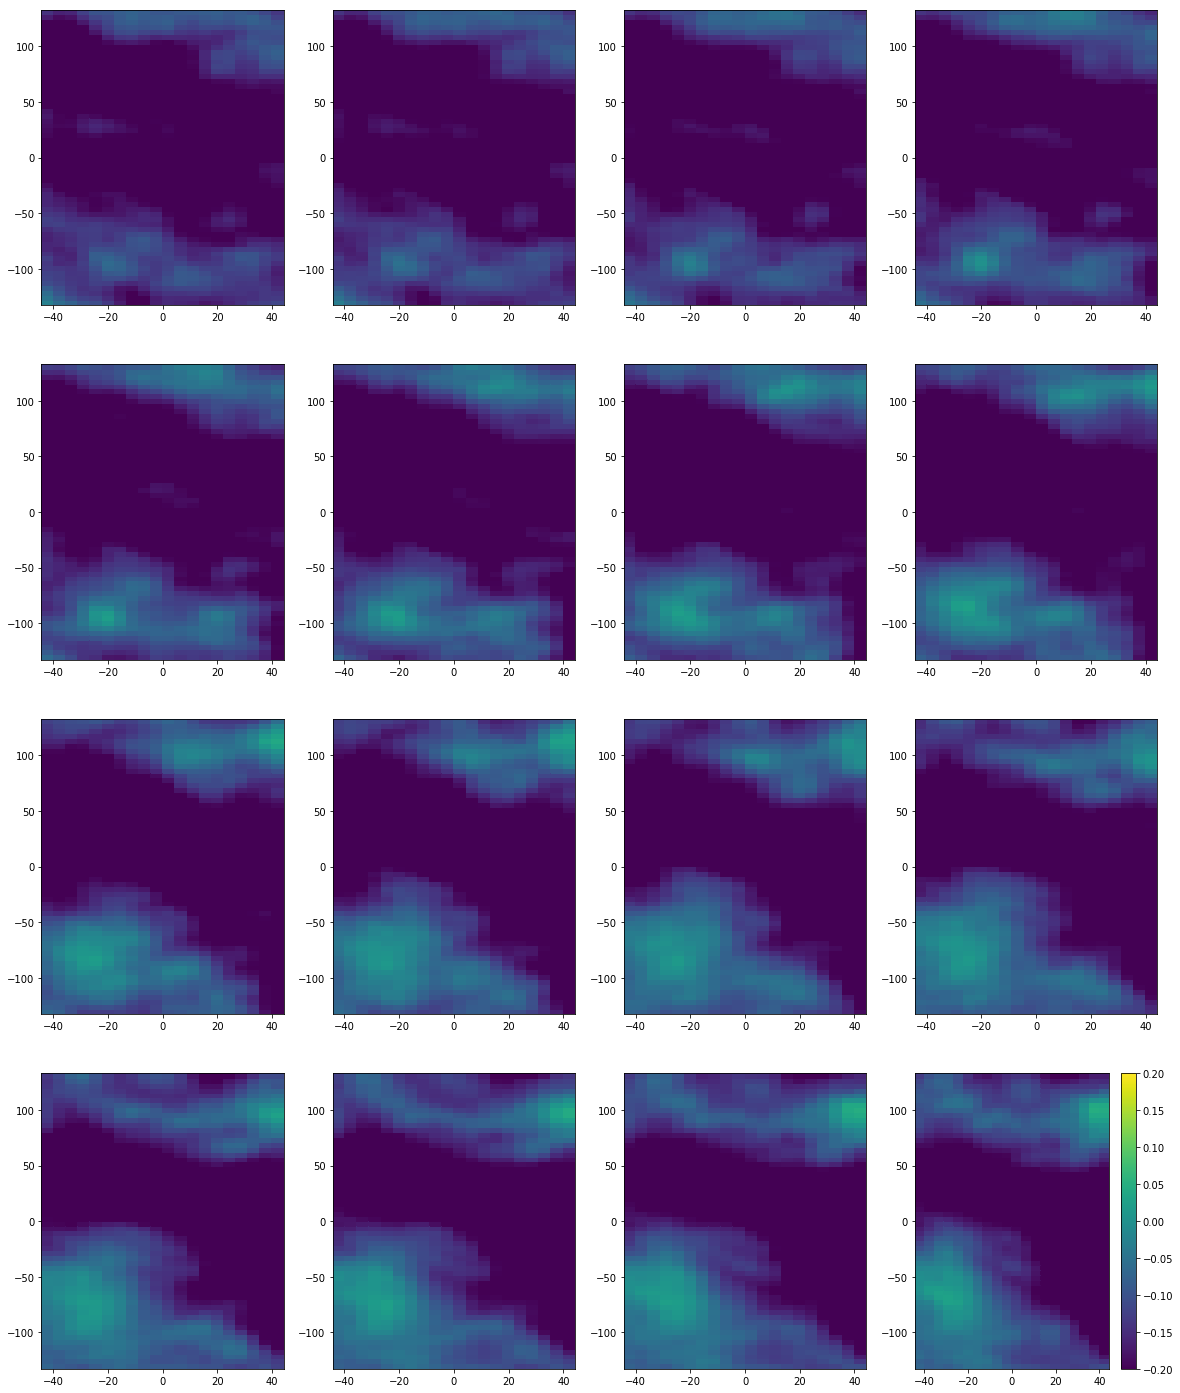

In [65]:
fig,axs=plt.subplots(4,4,figsize=(20,25))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.pcolormesh(X[0,...],Y[0,...],mean_flow[i*4+j,...,0],vmin=-0.2,vmax=0.2)
#    plt.colorbar()
plt.colorbar()

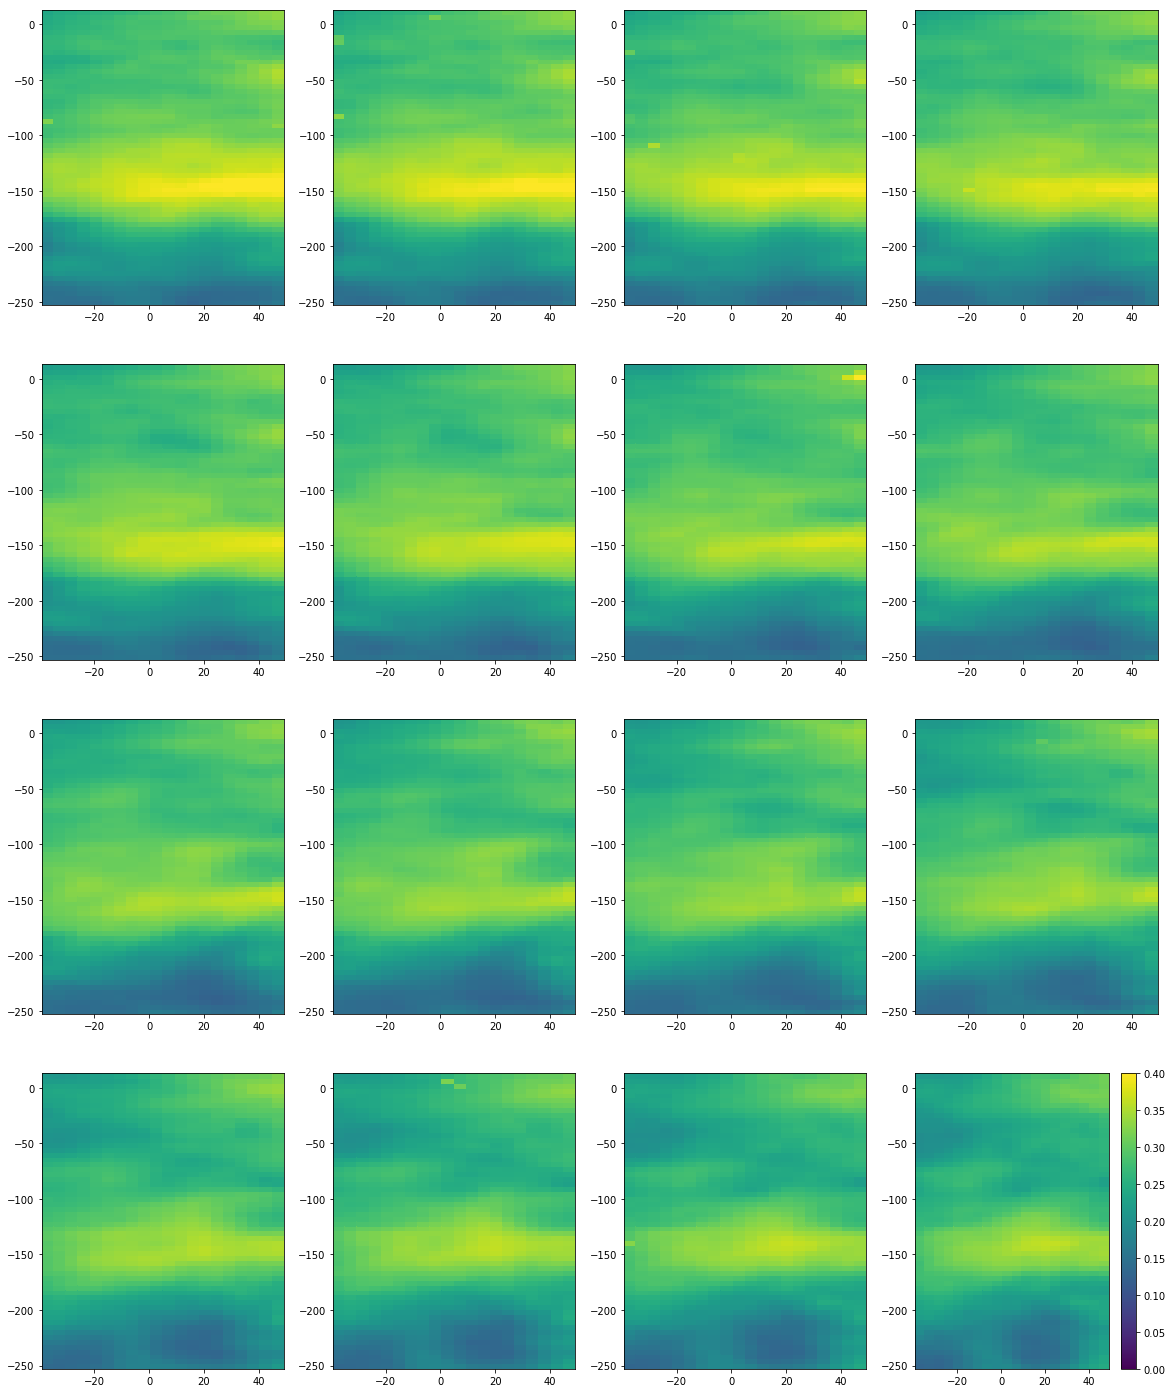

In [38]:
fig,axs=plt.subplots(4,4,figsize=(20,25))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.pcolormesh(X[0,...],Y[0,...],u_rms[i*4+j,...],vmin=0,vmax=0.4)
#    plt.colorbar()
plt.colorbar()

In [67]:
M.PIV3D.m.keys()

dict_keys(['U', 'mean_flow', 'fluc', 'u_rms', 'overlap'])

In [69]:
f = h5pylea.file_name_in_dir(M, savefolder)
h5pylea.obj_in_h5py(M,f)
f.close()

[array([255,  25,  26, ...,  29,  26,  27], dtype=uint8), array([255,  24,  25, ...,  23,  27,  25], dtype=uint8), array([255,  26,  27, ...,  28,  22,  23], dtype=uint8), array([255,  28,  25, ...,  33,  28,  25], dtype=uint8), array([255,  24,  26, ...,  28,  26,  24], dtype=uint8), array([255,  26,  28, ...,  23,  29,  27], dtype=uint8), array([255,  25,  24, ...,  29,  29,  23], dtype=uint8), array([255,  27,  27, ...,  25,  24,  27], dtype=uint8), array([255,  23,  28, ...,  28,  26,  29], dtype=uint8), array([255,  26,  26, ...,  26,  25,  26], dtype=uint8), array([255,  29,  26, ...,  25,  28,  29], dtype=uint8), array([255,  25,  25, ...,  27,  31,  28], dtype=uint8), array([255,  30,  29, ...,  31,  28,  27], dtype=uint8), array([255,  25,  28, ...,  25,  28,  23], dtype=uint8), array([255,  31,  29, ...,  27,  27,  29], dtype=uint8), array([255,  28,  27, ...,  26,  25,  27], dtype=uint8), array([255,  29,  24, ...,  27,  25,  25], dtype=uint8), array([255,  28,  28, ...,  25

[[[[[-1.23468399e-01 -1.06401443e-01]
    [ 3.95240784e-02 -2.03538895e-01]
    [ 1.51737213e-01 -1.25419617e-01]
    ...
    [ 5.16777039e-02  8.68141174e-01]
    [ 2.80380249e-02  6.94602966e-01]
    [ 5.58815002e-02  5.65692902e-01]]

   [[-6.72740936e-02 -1.17200851e-01]
    [ 4.85572815e-02 -3.99684906e-01]
    [ 2.19211578e-01 -3.01610947e-01]
    ...
    [ 1.21402740e-01  7.60993958e-01]
    [ 2.39913940e-01  6.01291656e-01]
    [ 2.75512695e-01  5.19767761e-01]]

   [[-9.17797089e-02 -1.90555573e-01]
    [-2.36911774e-02 -3.10941696e-01]
    [ 7.01255798e-02 -2.53337860e-01]
    ...
    [ 3.23612213e-01  6.49780273e-01]
    [ 3.14365387e-01  5.59383392e-01]
    [ 3.23741913e-01  4.59690094e-01]]

   ...

   [[-4.25825119e-01 -2.08019257e-01]
    [-6.71878815e-01  4.08782959e-02]
    [-6.04597092e-01 -1.06828690e-01]
    ...
    [ 3.77655029e-02  3.37860107e-01]
    [ 2.19974518e-01  3.80722046e-01]
    [ 1.63330078e-01  3.36265564e-01]]

   [[-6.12697601e-01  1.77349091e-01]
  

[[[[-0.02675269 -0.10646099]
   [-0.04478481 -0.10135211]
   [-0.05989137 -0.08555783]
   ...
   [-0.16806282  0.14311389]
   [-0.14322272  0.17489689]
   [-0.14214122  0.21995512]]

  [[-0.05788217 -0.1057163 ]
   [-0.07791303 -0.09698423]
   [-0.0947848  -0.07901198]
   ...
   [-0.19028767  0.1233019 ]
   [-0.1637043   0.16556521]
   [-0.1507357   0.20636191]]

  [[-0.07638228 -0.11603426]
   [-0.10448593 -0.11088682]
   [-0.12078953 -0.09316258]
   ...
   [-0.18171039  0.1064449 ]
   [-0.15907601  0.14388067]
   [-0.14087545  0.17736957]]

  ...

  [[-0.12536987 -0.20275277]
   [-0.13439438 -0.21270169]
   [-0.1347478  -0.2050672 ]
   ...
   [-0.0935217   0.15529515]
   [-0.11442229  0.15942385]
   [-0.12315982  0.13325905]]

  [[-0.11599506 -0.18170995]
   [-0.13159336 -0.19200352]
   [-0.13856496 -0.19481811]
   ...
   [-0.12288642  0.17810258]
   [-0.13688168  0.1816379 ]
   [-0.14026797  0.15888148]]

  [[-0.13213821 -0.15919104]
   [-0.14299307 -0.17226408]
   [-0.15489936 -0.1

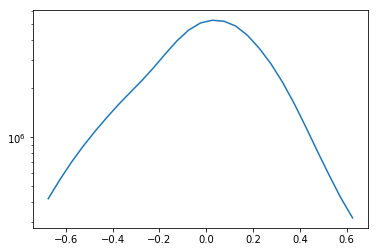

In [70]:
V = fluc[...,0]
[n,x] = np.histogram(np.ndarray.flatten(V),np.arange(-0.7,0.7,0.05))
x = (x[1:]+x[:-1])/2
plt.semilogy(x,n)

In [68]:
fluc.shape

(3150, 16, 21, 61, 2)

In [75]:
M.data.param.fx = float(M.data.param.fx)

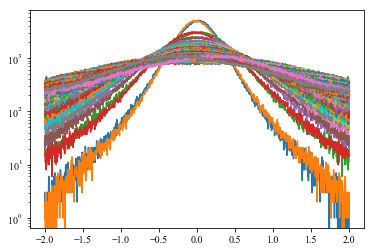

In [119]:
i=1
a = 50
blist = np.arange(i,a)
V2 = []
V3 = []

j = 15
stdfluc = np.std(fluc[:,j,:,a:,0])

for b in blist:
    V = (fluc[:,j,:,a:,0]-fluc[:,j,:,a-b:-b,0])/stdfluc
    V = V# - np.mean(V)
    [n,x] = np.histogram(np.ndarray.flatten(V),1000,[-2,2])
    x = (x[1:]+x[:-1])/2
    plt.semilogy(x,n)
    plt.semilogy(-x,n)
    
    V2.append(np.nanmean(V**2))
    V3.append(np.nanmean(V**3))
    
    
V2 = np.asarray(V2)
V3 = np.asarray(V3)

In [104]:
blist = np.arange(1,a)
blist = blist*piv.m['overlap']*M.data.param.fx
blist

array([ 4.432,  8.864, 13.296, 17.728, 22.16 , 26.592, 31.024, 35.456,
       39.888, 44.32 ])

In [162]:
m.PIV3D.m.keys()

dict_keys(['U', 'mean_flow', 'fluc', 'u_rms'])

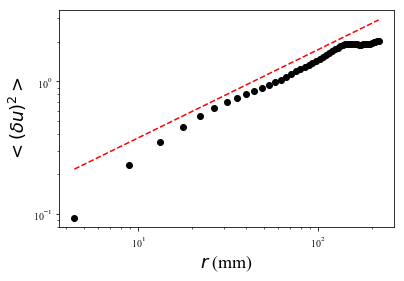

In [120]:
blist = np.arange(1,a)
blist = blist*piv.m['overlap']*M.data.param.fx
plt.loglog(blist,V2,'ko')

b0 = 4.5
alpha = 2./3

plt.loglog(blist,0.22*(blist/b0)**alpha,'r--')
#plt.axis([0,150,1,100])

fig = graphes.legende('$r$ (mm)','$<(\delta u)^2>$','')

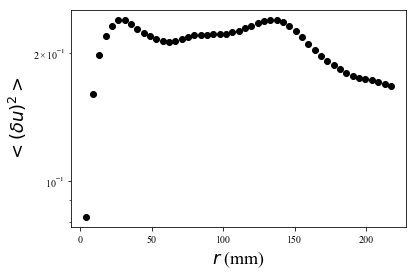

In [121]:
blist = np.arange(1,a)
blist = blist*piv.m['overlap']*M.data.param.fx
plt.semilogy(blist,10**3*(V2/2*stdfluc**2)**(3/2)/blist,'ko')

b0 = 4.5
alpha = 2./3

#plt.loglog(blist,0.25*(blist/b0)**alpha,'r--')
#plt.axis([0,150,1,100])

fig = graphes.legende('$r$ (mm)','$<(\delta u)^2>$','')

In [117]:
epsilon = 0.005

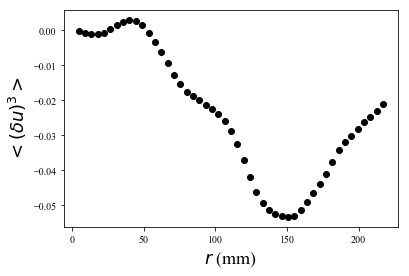

In [122]:
plt.plot(blist,V3*stdfluc**3,'ko')

b0 = 4.5
alpha = 2./3

#plt.plot(blist,-blist*4/5*epsilon*10**-3)
#plt.loglog(blist,0.25*(blist/b0)**alpha,'r--')
#plt.axis([0,40,-0.1,0.2])

fig = graphes.legende('$r$ (mm)','$<(\delta u)^3>$','')

In [172]:
piv.m['overlap']
m.data.param.fx

'0.277'

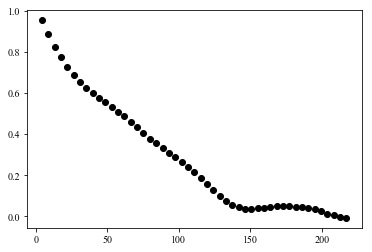

In [123]:
#blist = np.arange(1,50)
#blist = blist*overlap*fx
plt.plot(blist,1-V2/2,'ko')

b0 = 10
alpha = -0.5
#plt.loglog(blist,0.5*(blist/b0)**alpha,'r--')
#plt.axis([1,200,0.1,1])
#plt.axis([0,25,0,0.3])
#    plt.semilogy(-x,n,'r')

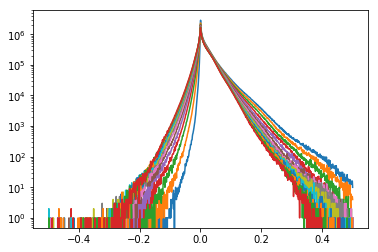

In [95]:
for b in range(1,15):
    V = fluc[...,30:,0]*fluc[...,30-b:-b,0]
    [n,x] = np.histogram(np.ndarray.flatten(V),1000,[-0.5,0.5])
    x = (x[1:]+x[:-1])/2
    plt.semilogy(x,n)
#    plt.semilogy(-x,n,'r')

In [92]:
Eku = np.abs(np.fft.fftshift(np.fft.fftn(fluc[...,0]**2,axes=(1,2,3)),axes=(1,2,3)))
Ekw = np.abs(np.fft.fftshift(np.fft.fftn(fluc[...,1]**2,axes=(1,2,3)),axes=(1,2,3)))

(16, 21, 61)
[15.649868627581101, 16.293154060324554, 17.221711633152143, 14.135945844126654, 16.427019369259042, 16.519511048551095, 14.81452031051697, 13.874664217727764, 10.595150305334496, 14.904906775056094, 10.756860905928434, 13.571739132234525, 9.634692890656929, 10.873631326992594, 12.753843786235691, 10.623900016446072, 9.387418356843735, 9.594903836338121, 10.042201367164887, 9.40942584575529, 7.693383120571897, 9.637016349913132, 9.986715317605436, 8.070531254678379, 8.449281181381542, 8.264908188141748, 7.463915483680387, 7.004733425947119, 8.234718414576129, 7.796859864659626, 7.187623079925772, 7.588487425860134, 6.632905419990437, 6.445098042676076, 6.675701462419035, 5.964259142757044, 6.250707174716402, 5.737830955973793, 5.641450778270699, 5.938333175438102, 5.560343693958164, 5.256009277584424, 5.4031696238588625, 5.139817300248224, 5.169547655479568, 4.622161683853426, 5.011316026240275, 4.368495256173741, 4.714245575337705, 3.9460458296845067, 4.501517020207098, 3

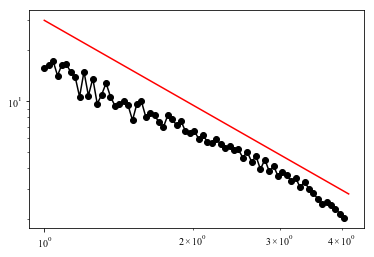

In [94]:
(Nt,Nz,Nx,Ny) = Eku.shape

fx = M.PIV3D.data.param.fx
overlap = piv.m['overlap']
dx = fx*overlap
fx = 0.277
k0x = 1/(2*dx)
k0z = 1/(2*dz)

kx = k0x*np.linspace(-Nx//2,Nx//2,Nx)
ky = k0x*np.linspace(-Ny//2,Ny//2,Ny)
kz = k0z*np.linspace(-Nz//2,Nz//2,Nz)

[Kx,Kz,Ky] = np.meshgrid(kx,kz,ky)
print(Kx.shape)

K = np.sqrt(Kx**2 + Ky**2 + Kz**2)

Klist = np.logspace(0,np.log10(np.max(K)),70)
E1d = []
for i,k0 in enumerate(Klist[:-1]):
    indices = np.logical_and(K>=Klist[i],K<Klist[i+1])
    #print(Ek[250,indices])
    val = np.nanmean(Ekw[:,indices])#*(Klist[i+1]-Klist[i])#*Klist[i]**2
    E1d.append(val)

print(E1d)
plt.loglog(Klist[:-1],E1d,'ko-')
plt.loglog(Klist,30*Klist**(-5./3),'r-')

In [158]:
10**-1.7

0.0199526231496888

dx : 
0.000277
dt_ab: 
0.001


In [27]:
ff.shape

(126000, 23, 63, 2)

(3150, 16, 23, 63, 2)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


24


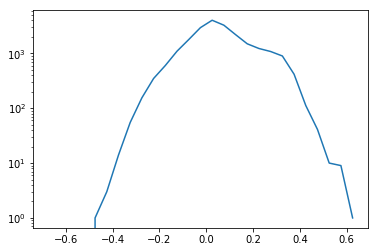

In [131]:
def display_correlation(t,C,DT=250):
    plt.subplot(1,3,1)
    plt.plot(t,C)
    plt.axis([-DT,DT,-0.2,1.05])
    graphes.legende('Time (ms)','$<u(t)u(t+\Delta t) >_{x,y,z}$','')

    plt.subplot(1,3,2)
    plt.plot(t,C)
    plt.axis([-DT/5,DT/5,0.75,1.05])
    graphes.legende('Time (ms)','','')

    plt.subplot(1,3,3)
    plt.plot(t,C)
    plt.axis([-DT/20,DT/20,0.9,1.01])
    graphes.legende('Time (ms)','','')

Total number of frames processed : 220
Volume with less than 5% error : 130


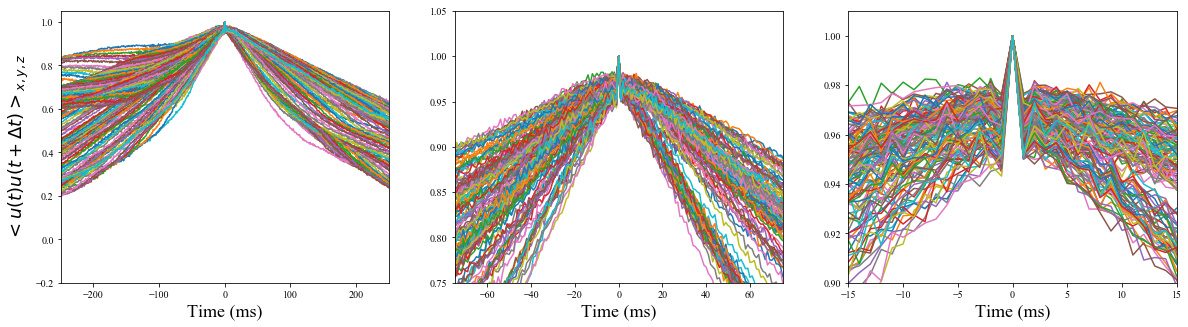

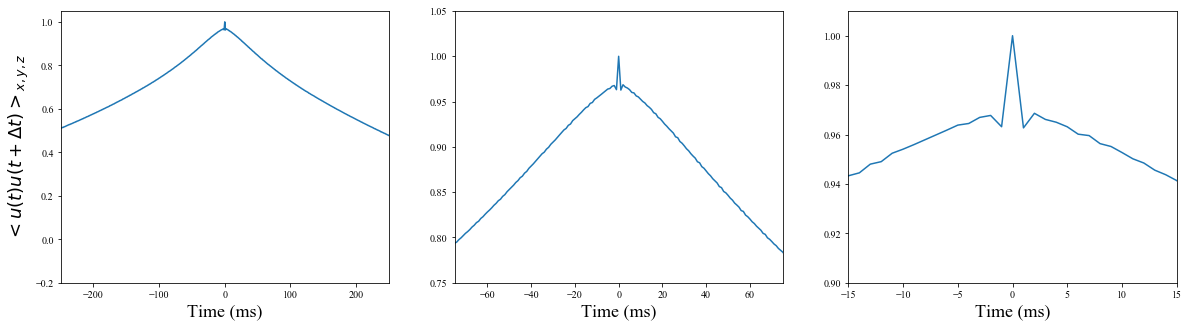

In [129]:
fig,axs=plt.subplots(1,3,figsize=(20,5))

good_frame = []
Ct = []
error = []
DT = 400
tlist = range(DT,3000-DT,10)
print("Total number of frames processed : "+str(len(tlist)))

for t0 in tlist:
    ff2 = np.nanmean(fluc[t0,...,0]**2,axis=(0,1,2))
    C = []
    t = np.arange(t0-DT,t0+DT,1)
    
    C0 = np.nanmean(fluc[t0+1,...,0]*fluc[t0,...,0],axis=(0,1,2))/ff2
    error.append(1-C0)
    if C0>0.95:  
        for tc in t:
#    print(tc)
            C0 = np.nanmean(fluc[tc,...,0]*fluc[t0,...,0],axis=(0,1,2))/ff2
            C.append(C0) 
        display_correlation(t-t0,C)        
        Ct.append(C)
        good_frame.append(t0)
Ct = np.asarray(Ct)

print("Volume with less than 5% error : "+str(Ct.shape[0]))
Ctmean = np.nanmean(Ct,axis=0)
tmean = t-t0

fig,axs=plt.subplots(1,3,figsize=(20,5))
display_correlation(tmean,Ctmean)

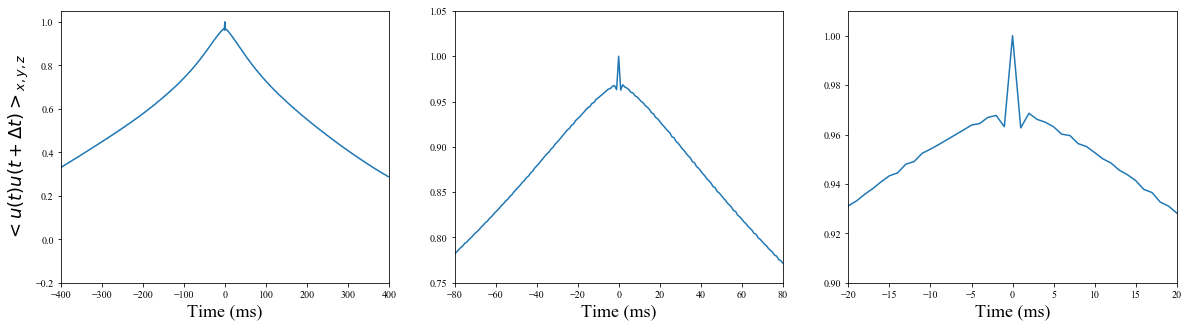

In [132]:
fig,axs=plt.subplots(1,3,figsize=(20,5))
display_correlation(tmean,Ctmean,DT=400)

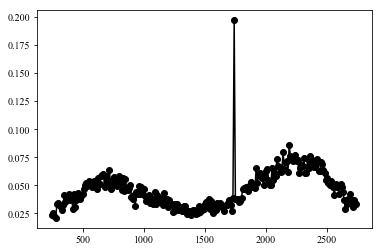

In [127]:
plt.plot(tlist,error,'ko-')
#plt.axis([1500,1600,0,0.8])

In [211]:
print(fluc.shape)

(2999, 40, 23, 63, 2)


Correlation time (ms) : 116 ms


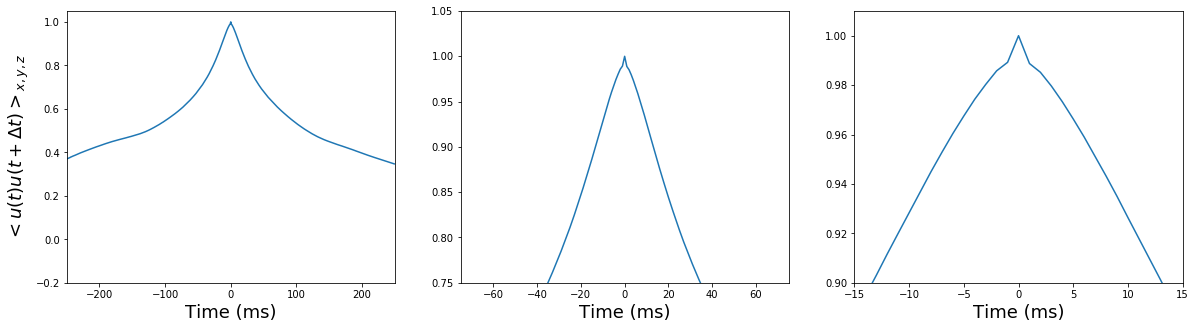

In [65]:
fig,axs=plt.subplots(1,3,figsize=(20,5))
display_correlation(tmean,Ctmean)

i = np.argmin(np.abs(Ctmean-0.5))
print('Correlation time (ms) : '+str(np.abs(tmean[i])) +' ms')

In [341]:
1024/384
41/17

2.411764705882353

In [66]:
#generate axis
(Nz,Nx,Ny,Nc) = mean_flow.shape
#mean_flow = np.transpose(mean_flow,(1,2,0,3))

dz = 42/20
x = np.arange(-(Nx-1)/2,(Nx-1)/2+1)*processing.dx*1E3*overlap+5
y = np.arange(-(Ny-1)/2,(Ny-1)/2+1)*processing.dx*1E3*overlap-120
z = np.arange(-Nz/2,Nz/2)*dz-2

#invariance by rotation in the plane (x,z)

[X,Z,Y] = np.meshgrid(x,z,y)
print(X.shape)

(16, 21, 61)


In [52]:
Xv = X[:,:-1,:-1]
Yv = Y[:,:-1,:-1]
Zv = Z[:,:-1,:-1]

flucv = fluc[...,:-1,:-1,:]

(Nz,Nx,Ny) = Xv.shape
(k0,i0,j0) = tuple(np.asarray(Xv.shape)//2)

#j0 = 4
print(Xv.shape)

x0 = Xv[k0,i0,j0]
y0 = Yv[k0,i0,j0]
z0 = Zv[k0,i0,j0]

R = np.sqrt((Xv-x0)**2+(Yv-y0)**2+(Zv-z0)**2)

ff2u = np.nanmean(flucv[:,k0,i0,j0,0]**2)
ff2v = np.nanmean(flucv[:,k0,i0,j0,1]**2)

Cmapu = flucv[...,0]*np.transpose(np.tile(flucv[:,k0,i0,j0,0],(Nz,Nx,Ny,1)),(3,0,1,2))
Cmapv = flucv[...,1]*np.transpose(np.tile(flucv[:,k0,i0,j0,1],(Nz,Nx,Ny,1)),(3,0,1,2))

print(Cmapu.shape)

(16, 22, 62)
(3150, 16, 22, 62)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


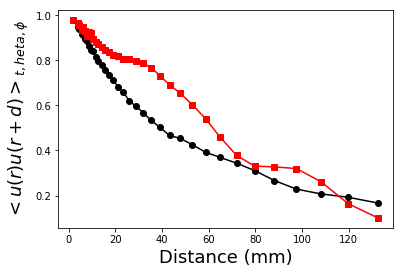

In [40]:
dlist = np.logspace(0,np.log10(np.max(R)),50)

Cdu = []
Cdv = []
for i,d in enumerate(dlist[:-1]):
    indices = np.logical_and(R>=dlist[i],R<dlist[i+1])
    #print(np.sum(indices))
    C0u = np.nanmean(Cmapu[:,indices])/ff2u
    C0v = np.nanmean(Cmapv[:,indices])/ff2v

    Cdu.append(C0u)
    Cdv.append(C0v)
    
plt.plot(dlist[:-1],Cdu,'ko-')
plt.plot(dlist[:-1],Cdv,'rs-')

fig = graphes.legende('Distance (mm)','$<u(r)u(r+d) >_{t,\theta,\phi}$','')

(16, 22, 62)
(1062, 16, 22, 62)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


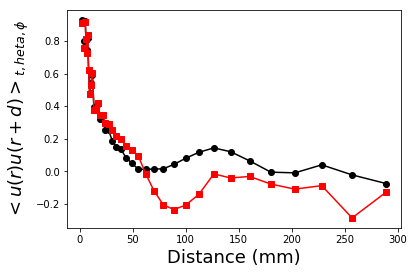

In [260]:
Xv = X[2:18,:-1,:-1]
Yv = Y[2:18,:-1,:-1]
Zv = Z[2:18,:-1,:-1]

flucv = fluc[:,2:18,:-1,:-1,:]

(Nz,Nx,Ny) = Xv.shape
(k0,i0,j0) = tuple(np.asarray(Xv.shape)//2)

j0 = 4
print(Xv.shape)

x0 = Xv[k0,i0,j0]
y0 = Yv[k0,i0,j0]
z0 = Zv[k0,i0,j0]

R = np.sqrt((Xv-x0)**2+(Yv-y0)**2+(Zv-z0)**2)

ff2u = np.nanmean(flucv[good_frame,k0,i0,j0,0]**2)
ff2v = np.nanmean(flucv[good_frame,k0,i0,j0,1]**2)

Cmapu = flucv[good_frame,...,0]*np.transpose(np.tile(flucv[good_frame,k0,i0,j0,0],(Nz,Nx,Ny,1)),(3,0,1,2))
Cmapv = flucv[good_frame,...,1]*np.transpose(np.tile(flucv[good_frame,k0,i0,j0,1],(Nz,Nx,Ny,1)),(3,0,1,2))

print(Cmapu.shape)
dlist = np.logspace(0,np.log10(np.max(R)),50)

Cdu = []
Cdv = []
for i,d in enumerate(dlist[:-1]):
    indices = np.logical_and(R>=dlist[i],R<dlist[i+1])
    #print(np.sum(indices))
    C0u = np.nanmean(Cmapu[:,indices])/ff2u
    C0v = np.nanmean(Cmapv[:,indices])/ff2v

    Cdu.append(C0u)
    Cdv.append(C0v)
    
plt.plot(dlist[:-1],Cdu,'ko-')
plt.plot(dlist[:-1],Cdv,'rs-')

fig = graphes.legende('Distance (mm)','$<u(r)u(r+d) >_{t,\theta,\phi}$','')

In [67]:
Xv = X[:,:-1,:-1]
Yv = Y[:,:-1,:-1]
Zv = Z[:,:-1,:-1]

flucv = fluc[...,:-1,:-1,:]

(Nz,Nx,Ny) = Xv.shape
(k0,i0,j0) = tuple(np.asarray(Xv.shape)//2)

j0 = 60
#i0 = 20

x0 = Xv[k0,i0,j0]
y0 = Yv[k0,i0,j0]
z0 = Zv[k0,i0,j0]

[R,Theta] = Smath.cart2pol(Xv-x0,Yv-y0)
#R = np.sqrt((Xv-x0)**2+(Yv-y0)**2)


ff2u = np.nanmean(flucv[...,i0,j0,0]**2)
ff2v = np.nanmean(flucv[...,i0,j0,1]**2)

Cmapu = flucv[...,0]*np.transpose(np.tile(flucv[...,i0,j0,0],(Nx,Ny,1,1)),(2,3,0,1))
Cmapv = flucv[...,1]*np.transpose(np.tile(flucv[...,i0,j0,1],(Nx,Ny,1,1)),(2,3,0,1))

print(Cmapu.shape)
dlist = np.logspace(np.log10(1),np.log10(np.max(R)),50)

Cdu = []
Cdv = []
Cd = []
for i,d in enumerate(dlist[:-1]):
    indices = np.logical_and(R>=dlist[i],R<dlist[i+1])
    #print(np.sum(indices))
    C0u = np.nanmean(Cmapu[...,indices])
    C0v = np.nanmean(Cmapv[...,indices])
    
    Cd.append((C0u+C0v)/(ff2u+ff2v))
#    C0l = 
#    C0t = 
    Cdu.append(C0u/ff2u)
    Cdv.append(C0v/ff2v)

fig,axs=plt.subplots(1,2,figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(dlist[:-1],Cd,'bo-')
plt.plot(dlist[:-1],Cdu,'ko-')
plt.plot(dlist[:-1],Cdv,'rs-')
plt.axis([0,50,0,1])
fig = graphes.legende('Distance (mm)','$<u(r)u(r+d) >_{t,\theta,\phi}$','')
                  
plt.subplot(1,2,2)
plt.plot(dlist[:-1],Cd,'bo-')
plt.plot(dlist[:-1],Cdu,'ko-')
plt.plot(dlist[:-1],Cdv,'rs-')
plt.plot(dlist,np.zeros(len(dlist)),'k--')
plt.axis([0,300,-0.5,1])
fig = graphes.legende('Distance (mm)','','')

IndexError: index 60 is out of bounds for axis 2 with size 60

In [60]:
Ek = np.abs(np.fft.fftshift(np.fft.fftn(fluc[...,:-1,:-1,0]**2,axes=(1,2,3)),axes=(1,2,3)))

In [61]:
print(Ek.shape)
np.sum(np.isnan(np.ndarray.flatten(Ek)))

(3150, 16, 22, 62)


68745600

(16, 22, 62)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


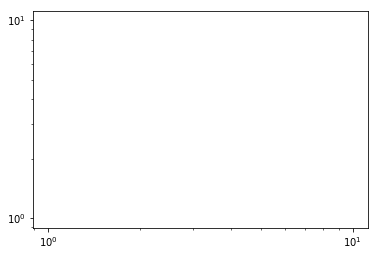

In [64]:
Ek = np.abs(np.fft.fftshift(np.fft.fftn(fluc[...,:-1,:-1,0]**2,axes=(1,2,3)),axes=(1,2,3)))

(Nt,Nz,Nx,Nt) = Ek.shape

kx = np.linspace(-Nx//2,Nx//2,Nx)
ky = np.linspace(-Ny//2,Ny//2,Ny)
kz = np.linspace(-Nz//2,Nz//2,Nz)

[Kx,Kz,Ky] = np.meshgrid(kx,kz,ky)
print(Kx.shape)

K = np.sqrt(Kx**2 + Ky**2 + Kz**2)

Klist = np.logspace(0,np.log10(np.max(K)),50)
E1d = []
for i,k0 in enumerate(Klist[:-1]):
    indices = np.logical_and(K>=Klist[i],K<Klist[i+1])
    #print(Ek[250,indices])
    val = np.nanmean(Ek[:,indices])
    E1d.append(val)

print(E1d)
plt.loglog(Klist[:-1],E1d,'ko-')
#plt.loglog(Klist,100*Klist**(-5./3),'r-')

In [266]:
a = np.ones((299,40))
np.transpose(np.tile(a,(23,63,1,1)),(2,3,0,1)).shape

(299, 40, 23, 63)

1475


[1200, 1750, -0.2, 1.05]

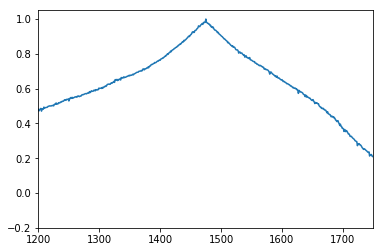

In [111]:
t = np.arange(0,2950,1)
n = len(t)
t0 = t[(n+1)//2]
print(t0)
ff2 = np.nanmean(fluc[t0,2:18,...,1]**2,axis=(0,1,2))
C = []
for tc in t:
#    print(tc)
    C.append(np.nanmean(fluc[tc,2:18,...,1]*fluc[t0,2:18,...,1],axis=(0,1,2))/ff2) 
plt.plot(t,C)
plt.axis([1200,1750,-0.2,1.05])

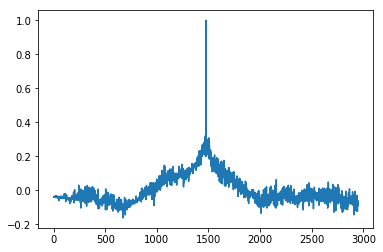

In [28]:
print(mean_flow.shape)
print(X[:,:,:].shape)

(40, 23, 63, 2)
(40, 23, 63)


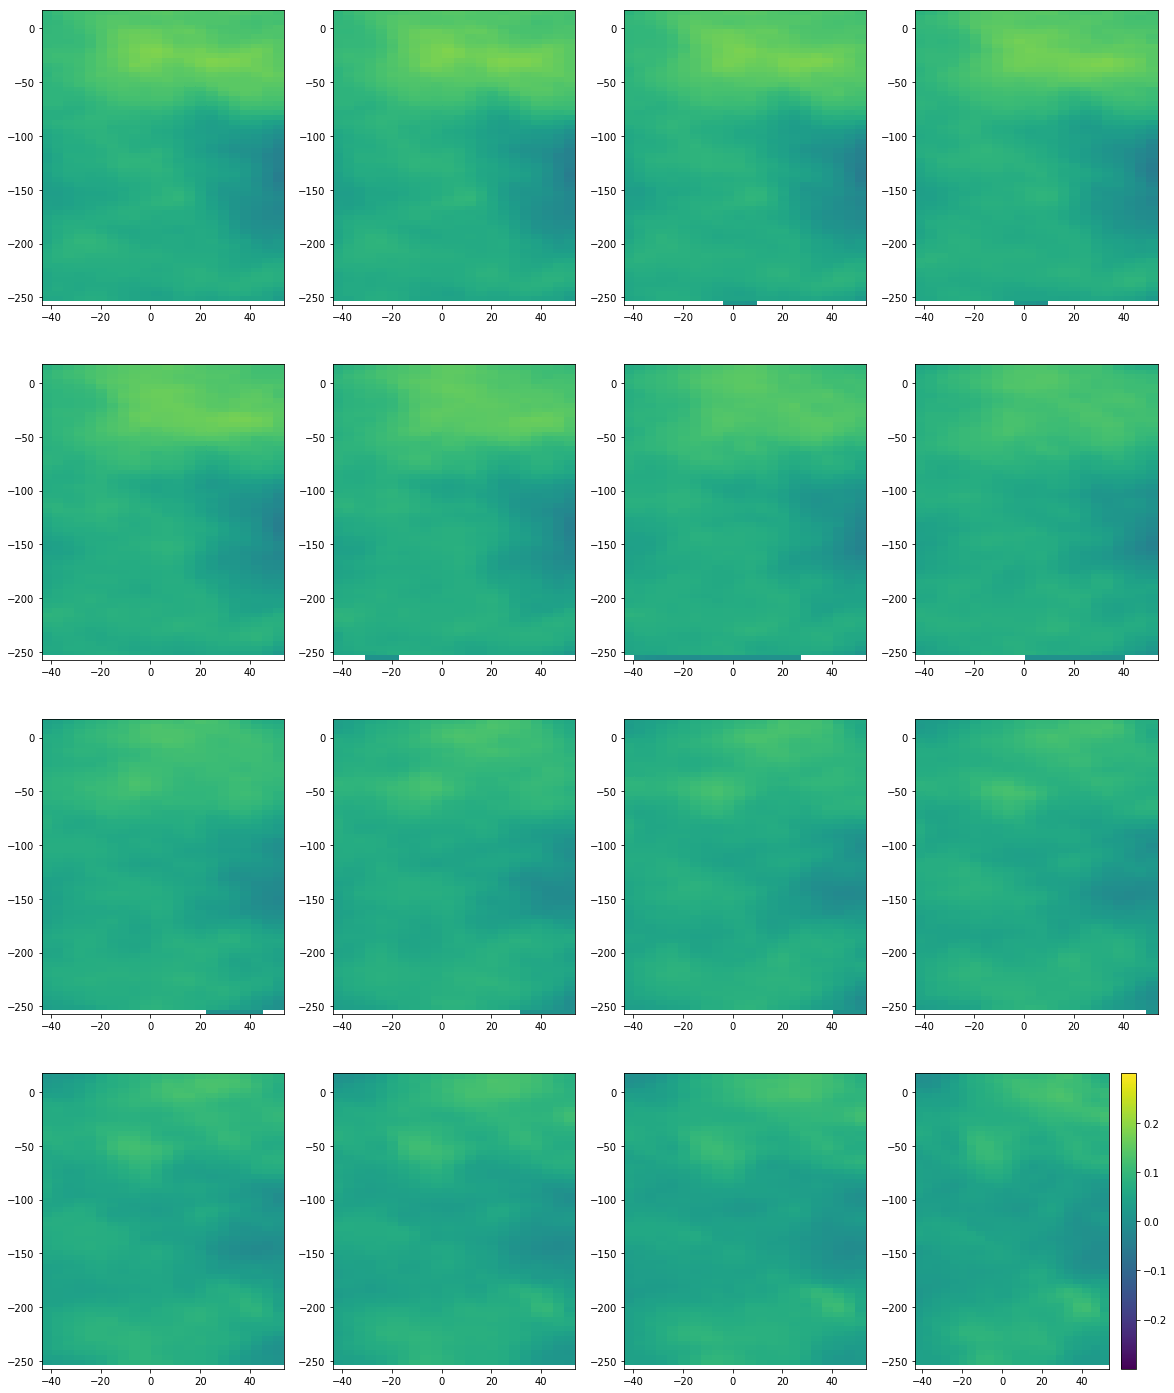

In [68]:
fig,axs=plt.subplots(4,4,figsize=(20,25))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.pcolormesh(X[0,...],Y[0,...],mean_flow[i*4+j,...,0],vmin=-0.3,vmax=0.3)
#    plt.colorbar()
plt.colorbar()

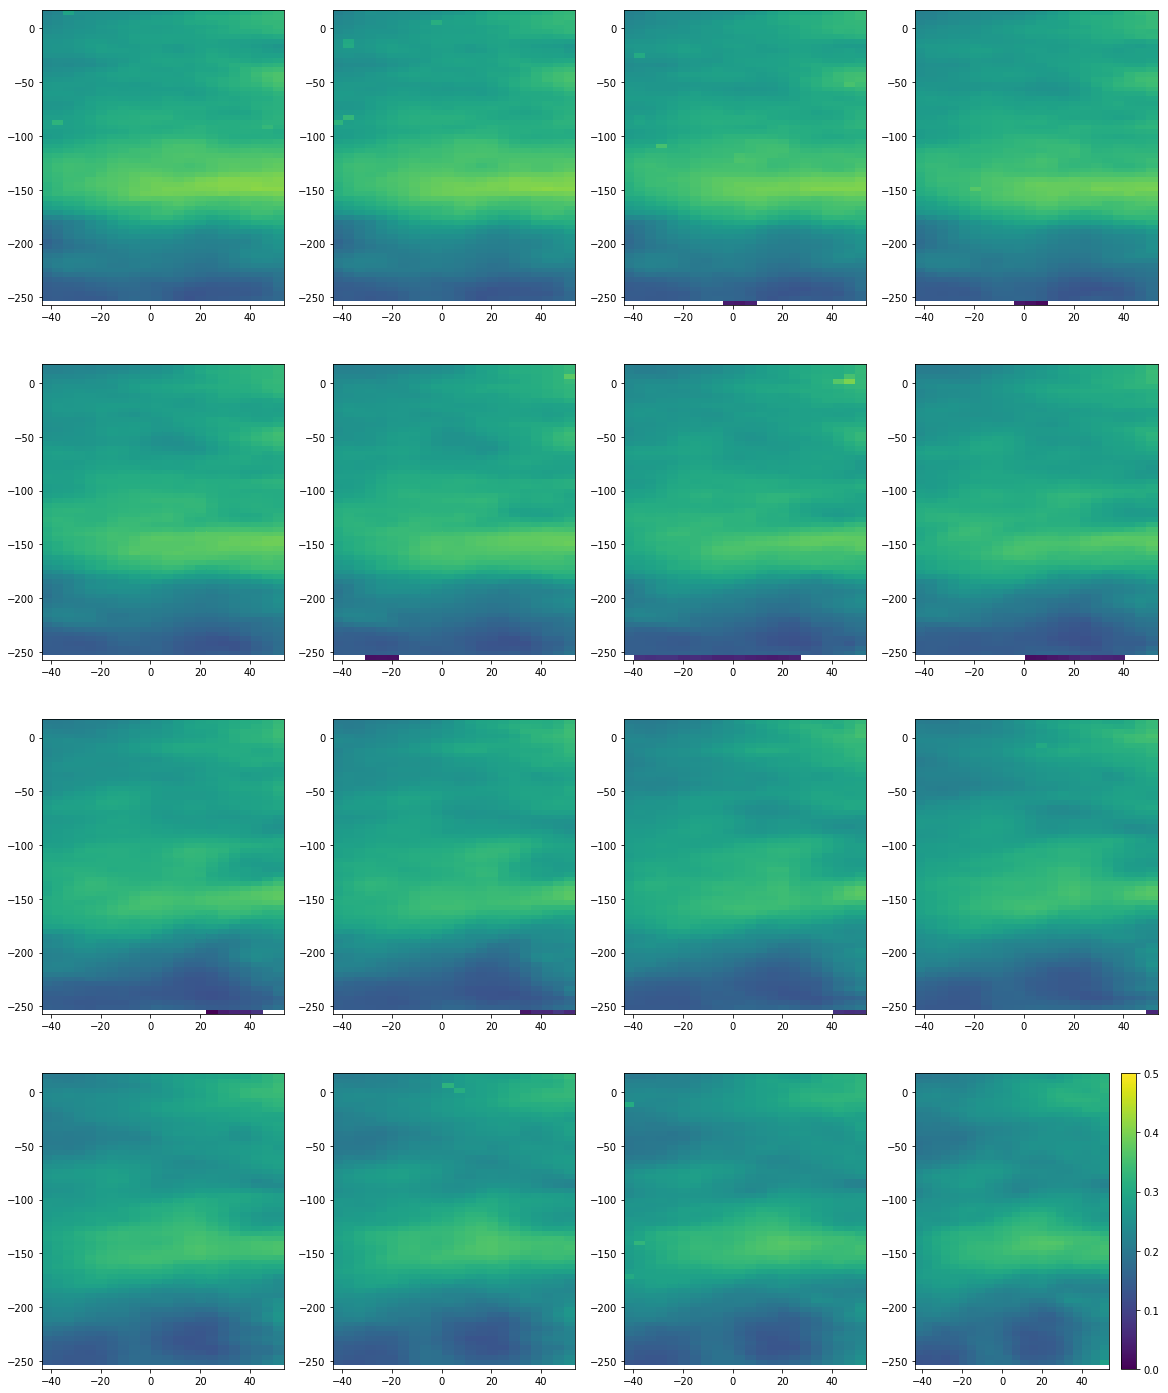

In [67]:
fig,axs=plt.subplots(4,4,figsize=(20,25))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.pcolormesh(X[0,...],Y[0,...],u_rms[i*4+j,...],vmin=0,vmax=0.5)
plt.colorbar()

(23, 63)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


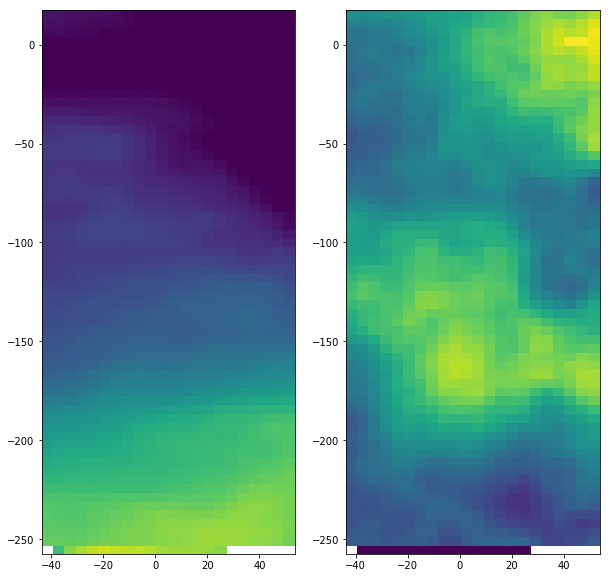

In [69]:
fig,axs=plt.subplots(1,2,figsize=(10,10))
print(mean_flow[10,...,0].shape)
axs[0].pcolormesh(X[0,...],Y[0,...],mean_flow[6,...,1],vmin=-0.3,vmax=0.3)
#plt.colorbar()

axs[1].pcolormesh(X[0,...],Y[0,...],np.nanmean(fluc[:,6,...,0]**2,axis=0),vmin=0,vmax=0.05)
#plt.colorbar()

In [338]:
[R,Theta] = Smath.cart2pol(X,Z)
Ur = 2*mean_flow[...,1]*np.cos(Theta)  #coefficient to be compensated by the circle fraction avalaible, so the coeff is r dependent
Utheta = -2*mean_flow[...,1]*np.sin(Theta) #average along Theta still required

fur = interp.RegularGridInterpolator((z,x,y),Ur,method='linear',bounds_error=False,fill_value=np.nan)
fut = interp.RegularGridInterpolator((z,x,y),Utheta,method='linear',bounds_error=False,fill_value=np.nan)
fuz = interp.RegularGridInterpolator((z,x,y),mean_flow[...,0],method='linear',bounds_error=False,fill_value=np.nan)

#futheta = interp.RegularGridInterpolator(Utheta, values, method='linear', bounds_error=True, fill_value=nan)[source]


In [248]:
print(Ur.shape)

(16, 31, 63)


In [242]:
helicity = fur((R[:,:,40]*np.cos(Theta[:,:,]),x[5],y[40]))

array([-0.073379  , -0.07342986, -0.06604033, -0.06482857, -0.06580828,
       -0.06344544, -0.05669815, -0.04911837, -0.03393364, -0.02424669,
       -0.01768416, -0.01310526, -0.00867227, -0.00059881,  0.00032977,
        0.00036066])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


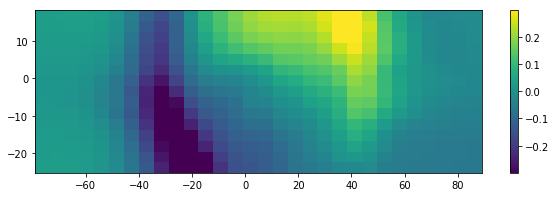

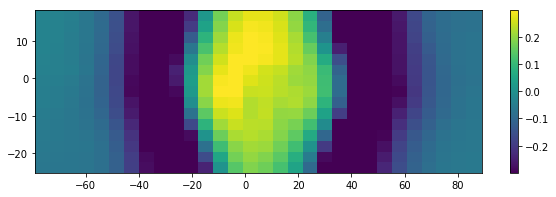

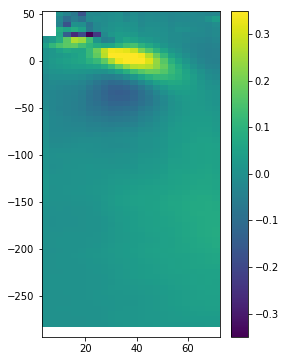

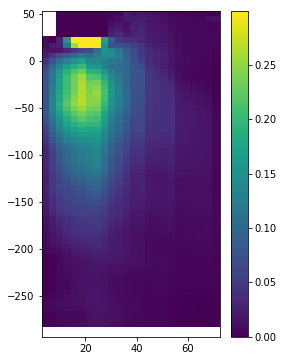

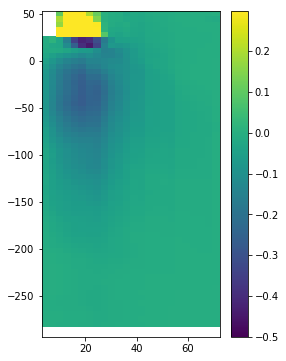

In [340]:
k =52

fig,axs=plt.subplots(1,1,figsize=(10,3))
plt.pcolormesh(X[...,0],Z[...,0],mean_flow[...,k,1],vmin=-0.3,vmax=0.3)
plt.colorbar()

fig,axs=plt.subplots(1,1,figsize=(10,3))
plt.pcolormesh(X[...,0],Z[...,0],mean_flow[...,k,0],vmin=-0.3,vmax=0.3)
plt.colorbar()



#fig,axs=plt.subplots(1,1,figsize=(10,3))
#plt.pcolormesh(X[...,0],Z[...,0],Ur[...,k],vmin=-0.3,vmax=0.3)
dtheta = 2*np.pi/50
theta = np.arange(np.pi/2,2*np.pi+np.pi/2,dtheta)
dr = dz
R0 = np.arange(dz,dz*(Nx-5),dz)
Nr = len(R0)

#plt.plot(np.min(R0)*np.cos(theta),np.min(R0)*np.sin(theta),'r')
#plt.plot(np.max(R0)*np.cos(theta),np.max(R0)*np.sin(theta),'r')

UR = np.zeros((Ny,Nr))
UT = np.zeros((Ny,Nr))
UZ = np.zeros((Ny,Nr))

for i in range(len(y)):
    for j,r0 in enumerate(R0):
        UR[i,j] = np.nanmean(fur((r0*np.cos(theta),r0*np.sin(theta),y[i])))
        UT[i,j] = np.nanmean(fut((r0*np.cos(theta),r0*np.sin(theta),y[i])))
        UZ[i,j] = np.nanmean(fut((r0*np.cos(theta),r0*np.sin(theta),y[i])))
    

fig,axs=plt.subplots(1,1,figsize=(4,6))
plt.pcolormesh(Rf,Yf,UR,vmin=-0.35,vmax=0.35)
plt.colorbar()


fig,axs=plt.subplots(1,1,figsize=(4,6))
plt.pcolormesh(Rf,Yf,-UT,vmin=0.,vmax=0.3)
plt.colorbar()

fig,axs=plt.subplots(1,1,figsize=(4,6))
plt.pcolormesh(Rf,Yf,UZ,vmin=-0.5,vmax=0.3)
plt.colorbar()

y
#fig,axs=plt.subplots(1,1,figsize=(10,3))
#plt.pcolormesh(X[...,0],Z[...,0],Utheta[...,k],vmin=-0.3,vmax=0.3)
#plt.colorbar()



#fig,axs=plt.subplots(1,1,figsize=(5,8))
#plt.pcolormesh(X[0,...],Y[0,...],mean_flow[6,...,1],vmin=-0.3,vmax=0.3)
#plt.colorbar()

In [192]:
#definition of mask
x0 = 175
y0 = 130
width = 120
height = 50

ValueError: cannot reshape array of size 31248 into shape (1,63)

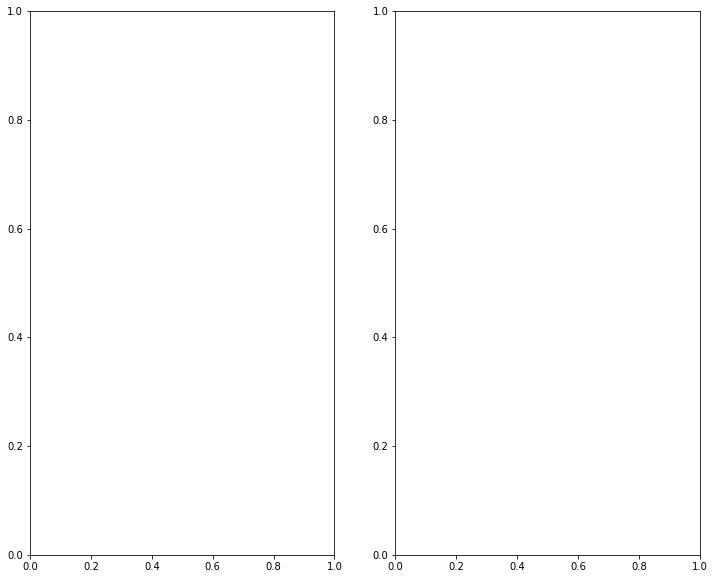

In [121]:
fig,axs=plt.subplots(1,2,figsize=(12,10)); axs=axs.flatten()
cax=[]
c=[]
j = 10
#for i in range(2):
#    divider = make_axes_locatable(axs[i])
#    cax.append(divider.append_axes('right', size='10%', pad=0.1))
    
for (i,data) in zip(range(2),[mean_speed[j,:,:],u_rms[j,:,:]]):
    #axs[i].clear()
    cb=axs[i].pcolormesh(X,Y,data,vmin=0,vmax=0.4)
#            cb=axs[i].pcolormesh(X,Y,ff[0,j,:,:,1],vmin=0,vmax=0.3)
#    fig.colorbar(cb)
#    c.append(fig.colorbar(cb, cax=cax[i], orientation='vertical'))

    axs[0].set_title(r'$y = '+str(int(z[j]))+' mm')
        #axs[1].set_title(r'$\bar u_{rms}$')

    axs[0].set_xlabel('$z$ (mm)')
    axs[i].set_xlabel('$x$ (mm)')
    #c[0].set_label(r'$\bar u$ (m/s)')
    #c[0].set_label(r'$\bar u_{rms}$ (m/s)')
    
    p=patches.Rectangle((x0,y0),width,height,facecolor='w',edgecolor='r')
    axs[i].add_patch(p)